In [ ]:
# prompt: load csv file

import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file
file_path = '/content/preprocessed_data.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Now you can work with the data in the DataFrame 'df'
print(df.head())  # Print the first few rows of the DataFrame



   Age  Gender Education Level  Tech Savviness  Hours Spent Online Daily  \
0   61    Male         College             6.0                  5.200000   
1   85  Female     High School             5.0                  2.700000   
2   65  Female        Graduate             6.0                  9.200000   
3   82  Female        Graduate             6.0                  1.100000   
4   80  Female        Graduate             6.0                  5.019149   

  Primary Device Used Social Media Usage  Email Awareness  Password Practices  \
0              Tablet                Yes                7                   2   
1              Tablet                Yes                7                   4   
2          Smartphone                Yes                8                   4   
3              Laptop                Yes                5                   3   
4              Laptop                Yes                6                   2   

  Two-Factor Authentication (2FA) Scam History Scam Type

### VISUALS

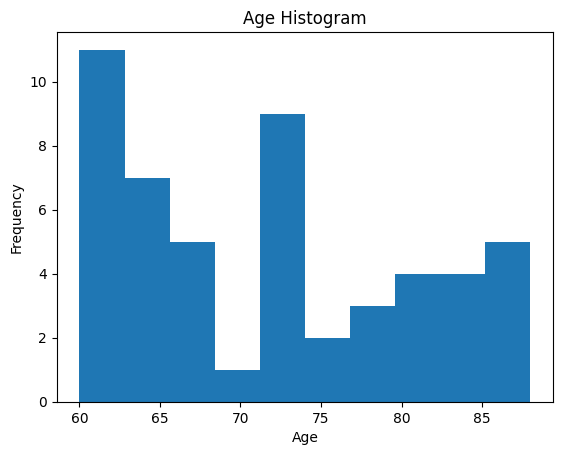

In [ ]:
# prompt: histogram for age

import matplotlib.pyplot as plt

# Assuming 'age' is the column name containing age data
plt.hist(df['Age'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.show()


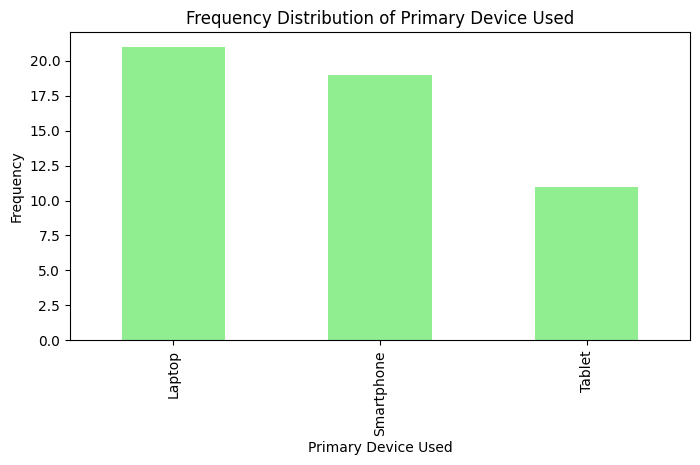

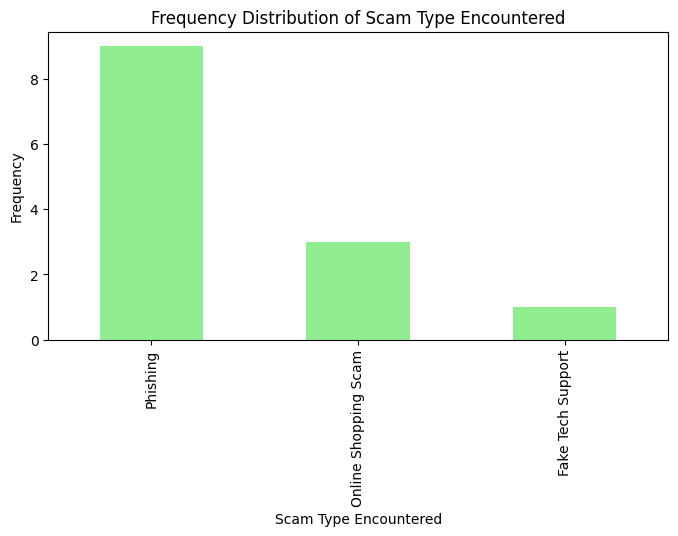

In [ ]:
# Frequency distribution of categorical features
categorical_features = ["Primary Device Used", "Scam Type Encountered"]
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    df[feature].value_counts(dropna=True).plot(kind="bar", color="lightgreen") # dropna=True to ignore NaN
    plt.title(f"Frequency Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

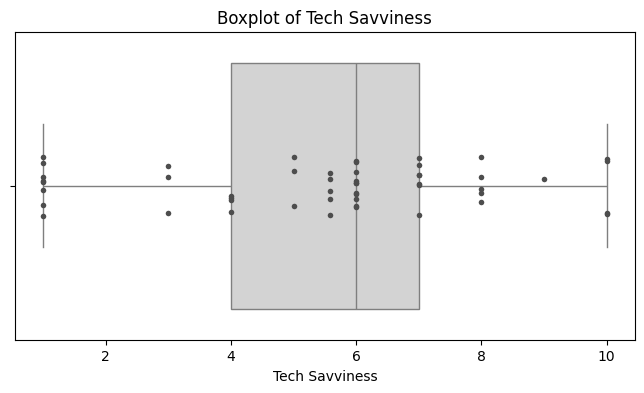

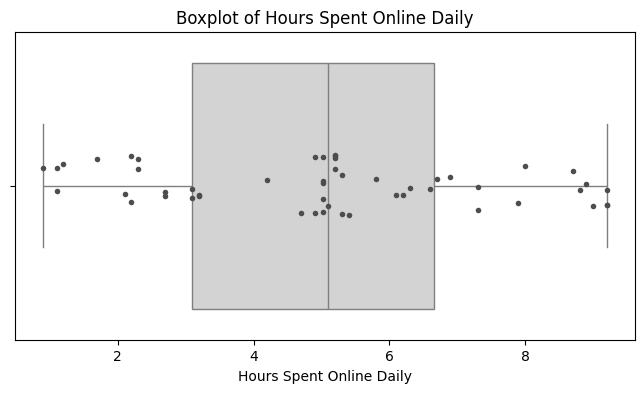

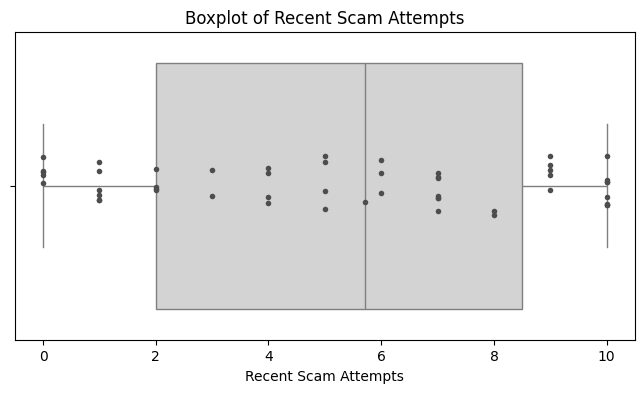

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical features with points overlaid
numerical_features = ["Tech Savviness", "Hours Spent Online Daily", "Recent Scam Attempts"]
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], color='lightgray')  # Create the boxplot
    sns.stripplot(x=df[feature], size=4, color='.3')  # Overlay points
    plt.title(f"Boxplot of {feature}")
    plt.show()

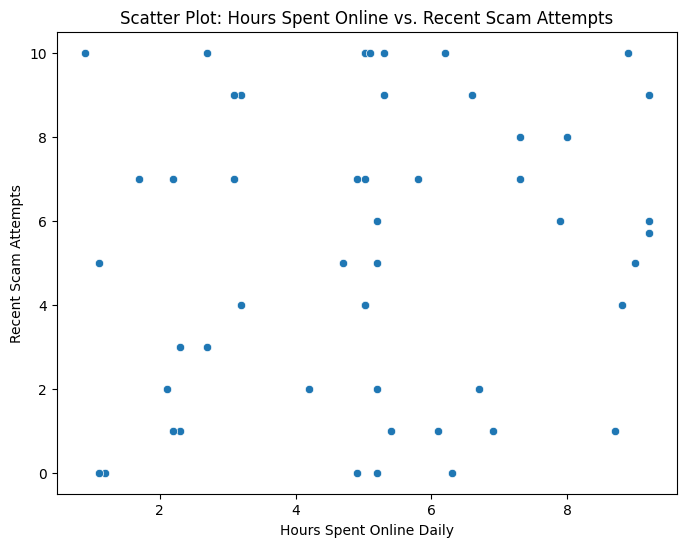

In [ ]:
# Scatter plot of "Hours Spent Online Daily" vs. "Recent Scam Attempts"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Hours Spent Online Daily"], y=df["Recent Scam Attempts"])
plt.title("Scatter Plot: Hours Spent Online vs. Recent Scam Attempts")
plt.xlabel("Hours Spent Online Daily")
plt.ylabel("Recent Scam Attempts")
plt.show()

Number of duplicate rows: 0


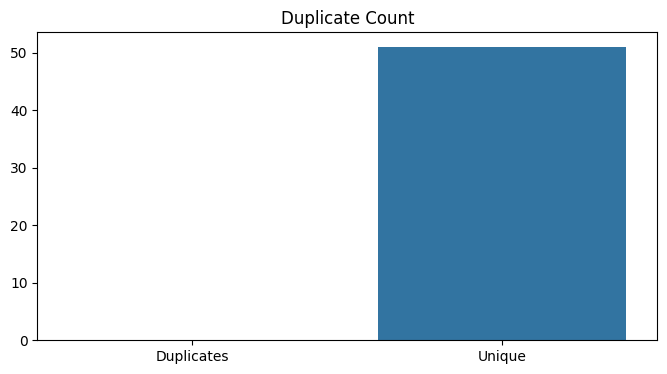

In [ ]:
# Detect and visualize duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display a few duplicate rows
if not duplicate_rows.empty:
    print("Sample duplicate rows:")
    print(duplicate_rows.head())

# Plot duplicate counts (if any)
plt.figure(figsize=(8, 4))
sns.barplot(x=["Duplicates", "Unique"], y=[len(duplicate_rows), len(df) - len(duplicate_rows)])
plt.title("Duplicate Count")
plt.show()

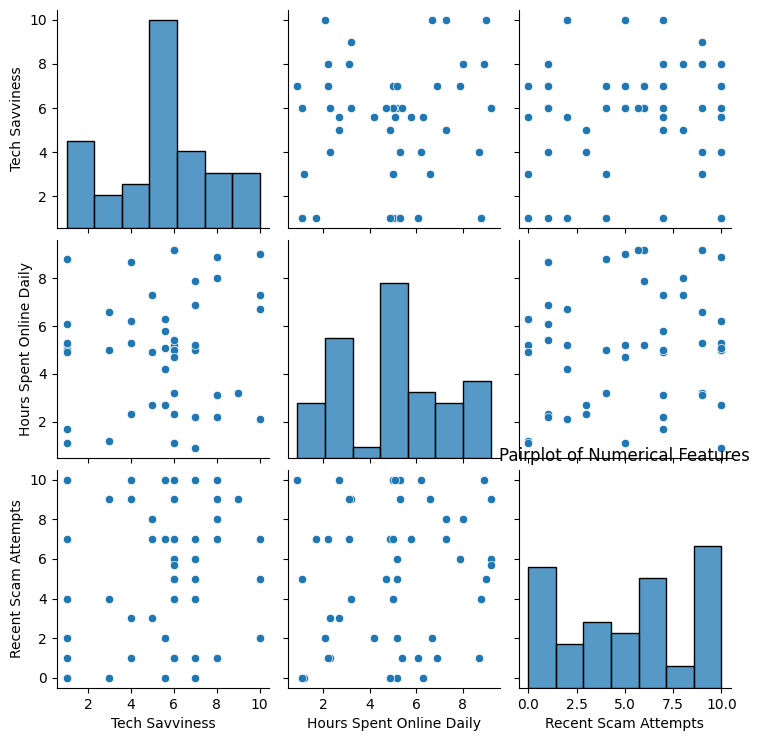

In [ ]:
sns.pairplot(df[numerical_features].dropna())
plt.title("Pairplot of Numerical Features")
plt.show()

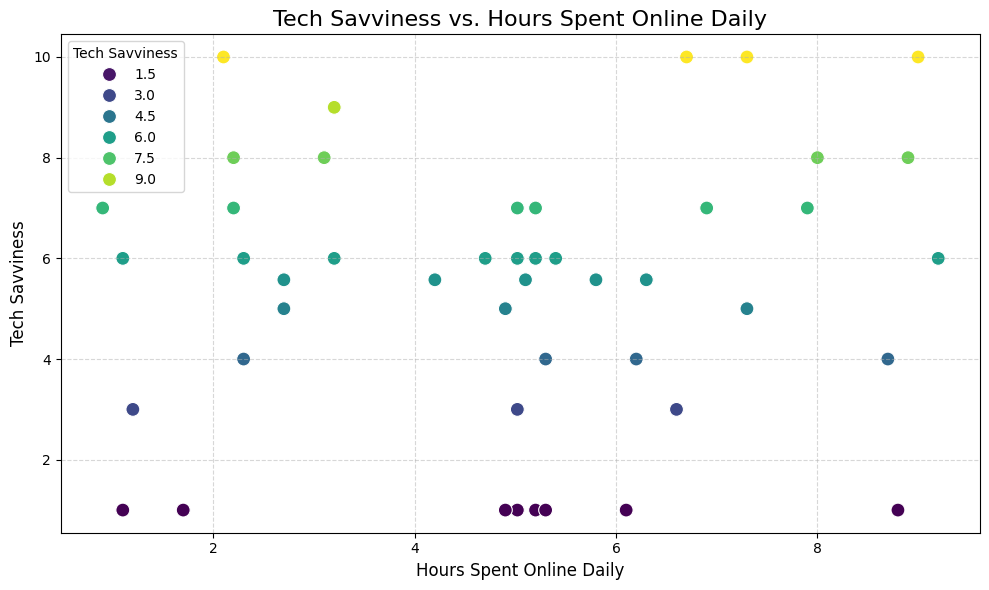

<ipython-input-3-411be44988ac>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Hours Category', y='Tech Savviness', data=df, palette="Set3")  # Use a boxenplot for better visualization of distributions


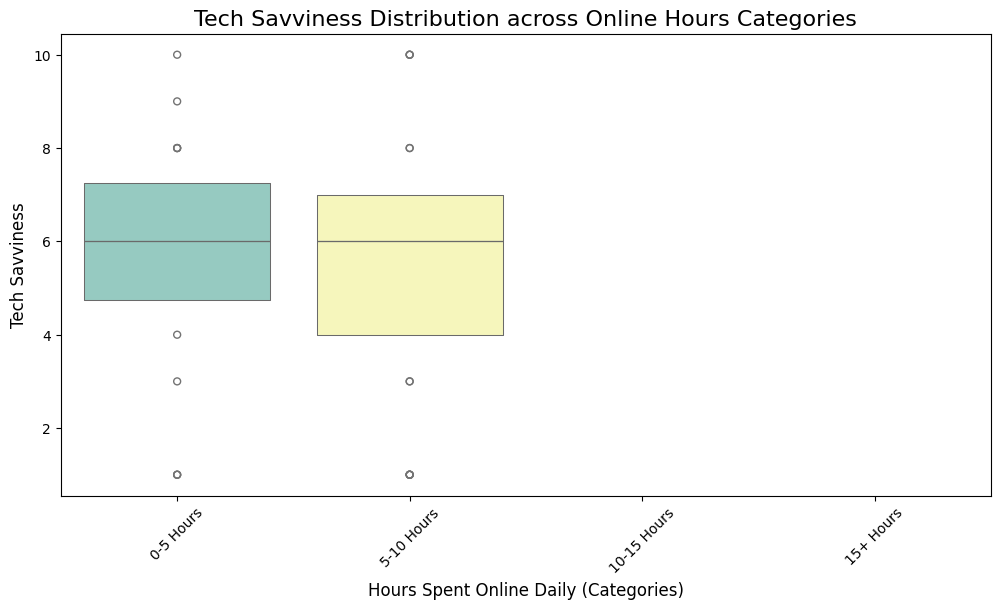

In [ ]:
# prompt: give me a visual representation optimal for showing techsavviness and hours spent online

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming the code from the previous response is run)
# ... (Your existing code to load the dataframe 'df')

# Create a combined plot for Tech Savviness and Hours Spent Online
plt.figure(figsize=(10, 6))

# Scatter plot with hue for Tech Savviness
sns.scatterplot(x="Hours Spent Online Daily", y="Tech Savviness", data=df, hue="Tech Savviness", palette="viridis", s=100)


# Add labels and title
plt.title("Tech Savviness vs. Hours Spent Online Daily", fontsize=16)
plt.xlabel("Hours Spent Online Daily", fontsize=12)
plt.ylabel("Tech Savviness", fontsize=12)

# Improve visual appeal
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()


plt.show()


# Additional visualization: Boxenplot for Tech Savviness across different hours online categories
# This visual will help identify if tech savviness differs significantly for people spending different amounts of time online

# Discretize "Hours Spent Online Daily" into categories for better visualization
bins = [0, 5, 10, 15, float('inf')] # Define custom bins
labels = ['0-5 Hours', '5-10 Hours', '10-15 Hours', '15+ Hours']
df['Hours Category'] = pd.cut(df['Hours Spent Online Daily'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.boxenplot(x='Hours Category', y='Tech Savviness', data=df, palette="Set3")  # Use a boxenplot for better visualization of distributions
plt.title("Tech Savviness Distribution across Online Hours Categories", fontsize=16)
plt.xlabel("Hours Spent Online Daily (Categories)", fontsize=12)
plt.ylabel("Tech Savviness", fontsize=12)
plt.xticks(rotation=45)
plt.show()

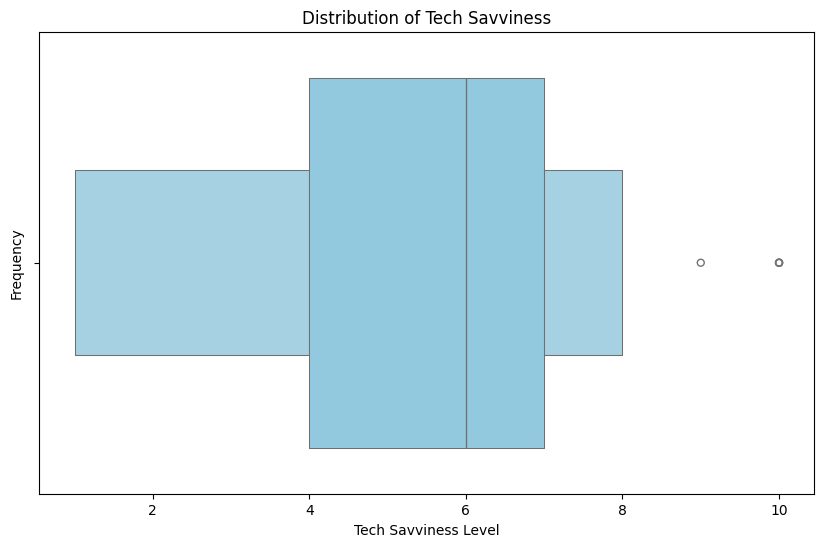

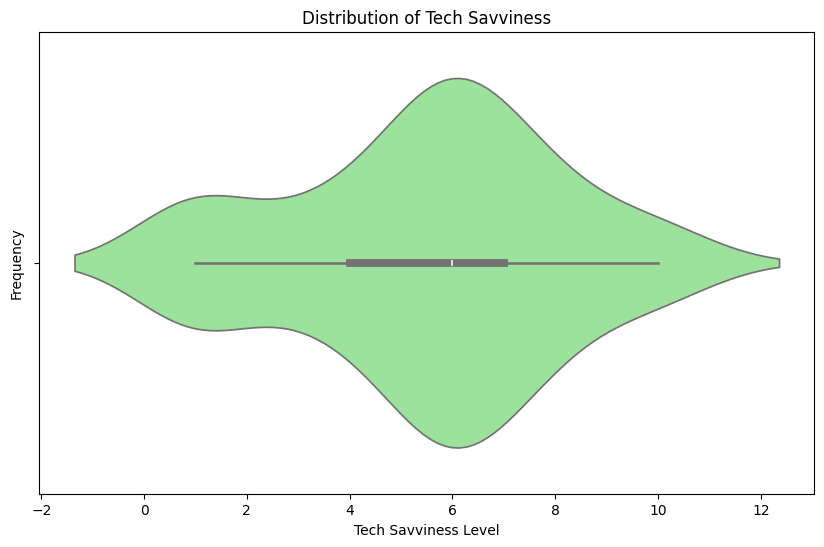

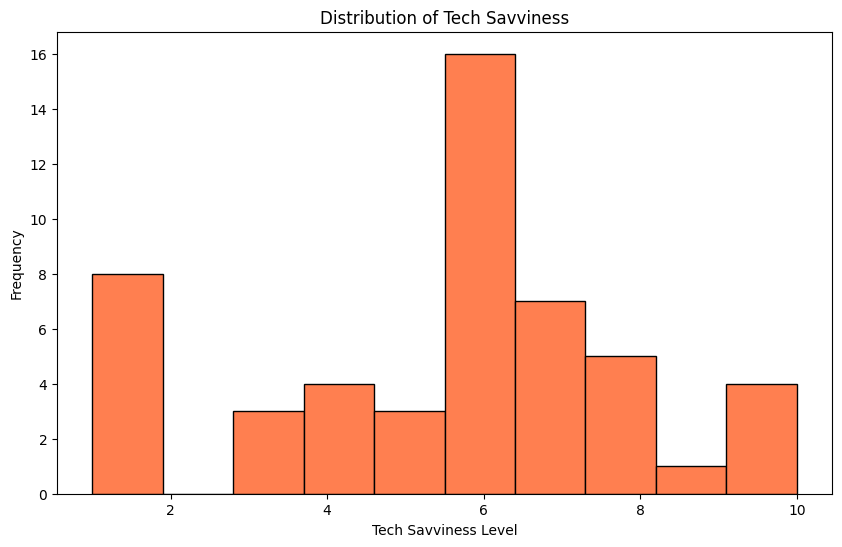

<ipython-input-4-58930830c68b>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Tech Savviness'], color='purple', shade=True)


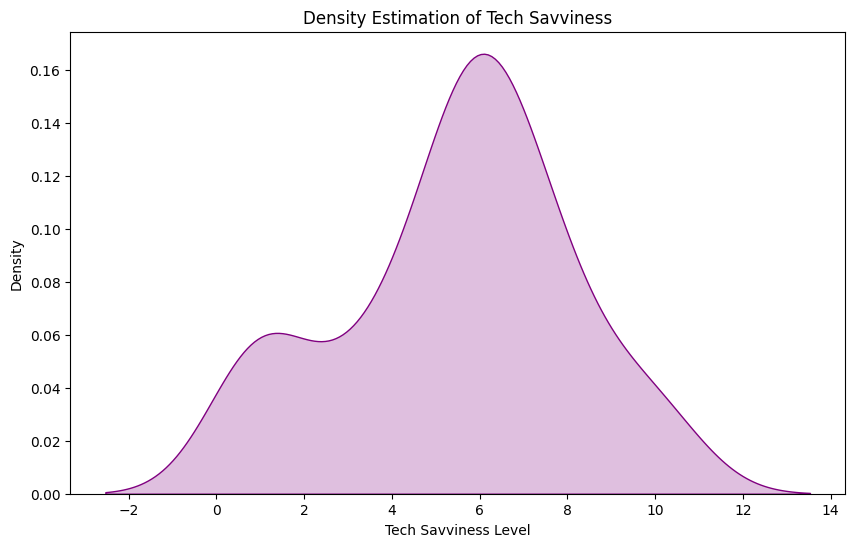

In [ ]:
# prompt: choose an optimal visual representation for tech savviness

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains 'Tech Savviness' and other relevant columns

# Boxenplot: Good for showing distribution and outliers across categories.
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Tech Savviness', data=df, color='skyblue')
plt.title('Distribution of Tech Savviness')
plt.xlabel('Tech Savviness Level')
plt.ylabel('Frequency')
plt.show()

# Violin plot: Combines boxplot and kernel density estimation to show distribution more clearly.
plt.figure(figsize=(10, 6))
sns.violinplot(x='Tech Savviness', data=df, color='lightgreen')
plt.title('Distribution of Tech Savviness')
plt.xlabel('Tech Savviness Level')
plt.ylabel('Frequency')
plt.show()

# Histogram: Simple and effective for showing frequency distribution.
plt.figure(figsize=(10, 6))
plt.hist(df['Tech Savviness'], bins=10, color='coral', edgecolor='black')  # Adjust number of bins as needed
plt.title('Distribution of Tech Savviness')
plt.xlabel('Tech Savviness Level')
plt.ylabel('Frequency')
plt.show()

# KDE plot: Shows the probability density function, providing a smooth representation of the distribution.
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Tech Savviness'], color='purple', shade=True)
plt.title('Density Estimation of Tech Savviness')
plt.xlabel('Tech Savviness Level')
plt.ylabel('Density')
plt.show()

### ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder # Import OneHotEncoder
import pandas as pd
import joblib


# Define features and target
X = df.drop(columns=["Online Safety"])
y = df["Online Safety"]

# Create a LabelEncoder for categorical features (if needed for y)
# If 'Online Safety' is categorical, use LabelEncoder on it
if pd.api.types.is_string_dtype(y):
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_features])
X_test_num = scaler.transform(X_test[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])

# Combine scaled numerical and encoded categorical features
X_train = pd.concat([pd.DataFrame(X_train_num, index=X_train.index, columns=numerical_features),
                     pd.DataFrame(X_train_cat, index=X_train.index, columns=encoder.get_feature_names_out(categorical_features))], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_num, index=X_test.index, columns=numerical_features),
                    pd.DataFrame(X_test_cat, index=X_test.index, columns=encoder.get_feature_names_out(categorical_features))], axis=1)


# Initialize and train the Logistic Regression model with increased max_iter
logreg = LogisticRegression(max_iter=1000, solver='saga')
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)
joblib.dump(dt, 'logistic_tree_model.pkl')
# Evaluate the model
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression - Accuracy: 0.6363636363636364


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate the model
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest - Accuracy: 0.6363636363636364
Confusion Matrix:
 [[0 2 0]
 [0 4 1]
 [0 1 3]]
Classification Report:
               precision    recall  f1-score   support

    Moderate       0.00      0.00      0.00         2
    Not Safe       0.57      0.80      0.67         5
        Safe       0.75      0.75      0.75         4

    accuracy                           0.64        11
   macro avg       0.44      0.52      0.47        11
weighted avg       0.53      0.64      0.58        11



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: i want to run a decision tree model on the same

import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


# Define features (X) and target (y)
X = df.drop(columns=["Online Safety"])
y = df["Online Safety"]

# Encode categorical features
categorical_features = X.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for feature in categorical_features:
    X[feature] = encoder.fit_transform(X[feature])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

joblib.dump(dt, 'decision_tree_model.pkl')

Decision Tree - Accuracy: 0.5454545454545454
Confusion Matrix:
 [[1 1 0]
 [0 3 2]
 [0 2 2]]
Classification Report:
               precision    recall  f1-score   support

    Moderate       1.00      0.50      0.67         2
    Not Safe       0.50      0.60      0.55         5
        Safe       0.50      0.50      0.50         4

    accuracy                           0.55        11
   macro avg       0.67      0.53      0.57        11
weighted avg       0.59      0.55      0.55        11



['decision_tree_model.pkl']